# Chapter : 8 : Estimation

Objective: Estimating based on insufficient evidence
        

In [1]:
from __future__ import division, print_function
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.misc
%matplotlib inline

## The Estimation Game

To estimate the mean $\mu$ of a distribution, the sample mean $\bar{x}$ is a good measure but if there are known outliers it can be better to use the median instead. Process is called estimation and the measure is called estimator.

If there are no outliers, the sample mean minimizes the Mean Square Error (MSE), given by the formula below, where $\bar{x}$ is computed over m tries.

$$MSE = \frac{1}{m} \sum (\bar{x} - \mu)^{2}$$

Where m is the number of times you play the estimation game

Sometimes minimizing MSE is not the best strategy. An estimator that has the highest chance of being right is the Maximum Likelihood Estimator (MLE).



Exercise 8.1:Write a function that draws 6 values from a normal distribution with $\mu$ = 0 and $\sigma$ = 1. Use the sample mean to estimate $\mu$ and compute the error $\bar{x}-\mu$. Run the function 1000 times and compute MSE. 

Now modify the program to use the median as an estimator. Compute MSE again and compare to the MSE for $\bar{x}$.

In [2]:
err_mean = np.zeros(1000)
err_med = np.zeros(1000)
for i in range(1000):
    dist = np.random.normal(0, 1, 6)
    err_mean[i] = np.mean(dist)
    err_med[i] = np.median(dist)
print("MSE using sample mean as estimator: %.3f" % (np.sum(np.power(err_mean, 2)) / 1000))
print("MSE using sample median as estimator: %.3f" % (np.sum(np.power(err_med, 2)) / 1000))

MSE using sample mean as estimator: 0.163
MSE using sample median as estimator: 0.223


## Guess the variance

One estimator for variance $\sigma^{2}$ is sample variance, which is a biased estimator because it tends to be too low for small samples.

$$S^{2} = \frac {1}{n} \sum (x_{i} - \bar{x})^{2}$$

The following is an unbiased estimator variant for $\sigma^{2}$.

$$S_{n-1}^{2} = \frac {1}{n-1} \sum (x_{i} - \bar{x})^{2}$$

Exercise 8.2:Write a function that draws 6 values froma normal distribution with $\mu$ = 0 and $\sigma$ = 1. Use the sample variance to estimate $\sigma^{2}$ and compute the error $S^{2} - \sigma^{2}$. Run the function 1000 times and compute mean error (not squared).

Now modify the program to use the unbiased estimator $S_{n-1}^{2}$. Compute the mean error again and see if it converges to zero as you increase the number of games.

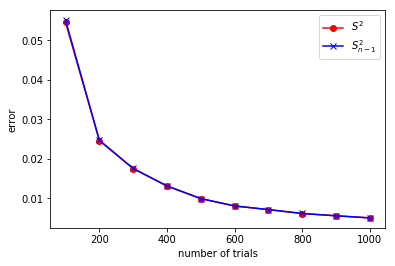

In [7]:
def estimate_variances(nbr_games):
    mean_error_biased = np.zeros(nbr_games)
    mean_error_unbiased = np.zeros(nbr_games)
    for i in range(nbr_games):
        dist = np.random.normal(0, 1, 6)
        xbar = np.mean(dist)
        s2 = np.sum(np.power(dist - xbar, 2)) / nbr_games
        mean_error_biased[i] = np.mean(s2)
        us2 = np.sum(np.power(dist - xbar, 2)) / (nbr_games - 1)
        mean_error_unbiased[i] = np.mean(us2)
    return np.mean(mean_error_biased), np.mean(mean_error_unbiased)

variances = []
for nbr_games in range(100, 1100, 100):
    variances.append(estimate_variances(nbr_games))
    
plt.plot(range(100, 1100, 100), [x[0] for x in variances], color='r', 
         marker='o', label=r"$S^{2}$")
plt.plot(range(100, 1100, 100), [x[1] for x in variances], color='b', 
         marker='x', label=r"$S_{n-1}^2$")
plt.xlabel("number of trials")
plt.ylabel("error")
plt.legend(loc="best")

## Understanding Errors

Its important to remember that you can compute the value of the estimator but not the value of the error because you don't have the labels.

## Exponential Distributions

Mean of an exponential distribution is $\frac{1}{\lambda}$, so our estimator is given by:

$$\hat{\lambda} = \frac {1}{\bar{x}}$$

But $\bar{x}$ is not robust in the presence of outliers, so the median estimator is given by the formula (here $\mu_{1/2}$ is the sample median).

$$\hat{\lambda_{1/2}} = \frac {ln(2)}{\mu_{1/2}}$$

Run an experiment to see which of $\lambda$ and $\lambda_{1/2}$ yields lower
MSE. Test whether either of them is biased (ie, see if it varies a lot by sample size).

MSE with mean as estimator: 69.786
MSE with median as estimator: 57.653


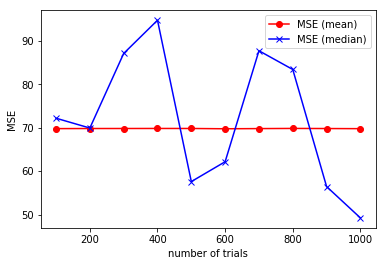

In [17]:
sample = np.array([5.384, 4.493, 19.198, 2.790, 6.122, 12.844])
input_mean = np.mean(sample)
input_med = np.median(sample)
lam = 1 / input_mean

# generate samples with lam_bar
xmeans = np.zeros(1000)
xmeds = np.zeros(1000)
for i in range(1000):
    dist_mean = np.random.exponential(lam, 6)
    xmeans[i] = np.mean(dist_mean)
    xmeds[i] = math.log(2, math.e) / np.median(dist_mean)
print("MSE with mean as estimator: %.3f" % (np.sum(np.power(xmeans - input_mean, 2)) / 1000))
print("MSE with median as estimator: %.3f" % (np.sum(np.power(xmeds - input_med, 2)) / 1000))

# test if either of them is biased 
mse_means = []
mse_meds = []
for nbr_trials in range(100, 1100, 100):
    xmeans = np.zeros(1000)
    xmeds = np.zeros(1000)
    for i in range(1000):
        dist_mean = np.random.exponential(lam, 6)
        xmeans[i] = np.mean(dist_mean)
        xmeds[i] = math.log(2, math.e) / np.median(dist_mean)
    mse_means.append(np.sum(np.power(xmeans - input_mean, 2)) / 1000)
    mse_meds.append(np.sum(np.power(xmeds - input_med, 2)) / 1000)
plt.plot(range(100, 1100, 100), mse_means, color="r", marker="o", label="MSE (mean)")
plt.plot(range(100, 1100, 100), mse_meds, color="b", marker="x", label="MSE (median)")
plt.xlabel("number of trials")
plt.ylabel("MSE")
plt.legend(loc="best")


## Confidence Intervals

Instead of apoint estimate, we want a confidence interval for $\lambda$. A 90% confidence interval is indicated by $\alpha$ = 0.1. The confidence interval of $\lambda$ is given by:

$$\left ( \hat{\lambda} \frac {\chi^{2}(2n, 1-\alpha/2)}{2n}, \hat{\lambda} \frac {\chi^{2}(2n, \alpha/2)}{2n} \right )$$

where n is the sample size, $\hat{\lambda}$ is the mean based estimator from previous section, and $\chi^{2}(k, x)$ is the CDF of a chi-squared distribution with k-degrees of freedom evaluated at x.

## Bayesian Estimation

Compute a 90% Confidence Interval for $\lambda$ for an exponential distribution, a sample of which is given by the following: {2.675, 0.198, 1.152, 0.787, 2.717, 4.269}. The value of $\lambda$ is drawn from a uniform distribution in the range (0.15, 1.5).

General approach is as follows:

Split up the interval into n equally spaced bins.

For each bin, we have H(i), the hypothesis that lambda is from this bin. Since its a uniform distribution, P(H(i)) = 1/n.

Compute P(X|H(i)) as follows:

$$P(X|H_{i}) = \prod_{j} PDF_{expo}(\lambda, x) = \prod_{j} \lambda e^{-\lambda x}$$

Compute P(H(i)|X) by Bayes theorem:

$$P(H_{i}|X) = P(H_{i})P(X|H_{i}) / f$$

where f is the normalizing factor, given by:

$$f = \sum P(H_{i})P(X|H_{i})$$

From the posterior distribution, we can now compute a CDF and find the confidence interval as the difference between the 95th percentile and 5th percentile.

In [18]:
# input
xs = np.array([2.675, 0.198, 1.152, 0.787, 2.717, 4.269])

# split uniform space from which lambda is drawn into m equal bins
bins = np.linspace(0.15, 1.5, 1001)
nbr_bins = bins.shape[0] - 1
p_h = np.ones(nbr_bins) / nbr_bins
p_xh = np.zeros(nbr_bins)

# H = lambda is from this bin; for each bin, find the P(X|H)
for i in range(nbr_bins):
    lb = bins[i]
    ub = bins[i+1]
    lams = np.random.uniform(low=lb, high=ub, size=100)
    p_xh_lams = np.ones(lams.shape[0])
    for j in range(lams.shape[0]):
        for k in range(xs.shape[0]):
            p_xh_lams[j] *= lams[j] * math.exp(-lams[j] * xs[k])
    p_xh[i] = np.mean(p_xh_lams)

# compute normalizing factor
f = np.dot(p_h, p_xh)

# compute posterior
p_hx = np.multiply(p_xh, p_h) / f

# compute CDF of posterior
cdf_phx_ps = np.cumsum(p_hx)
cdf_phx_xs = bins[:-1]

# compute 90 percent confidence interval
idx_5p = np.where(cdf_phx_ps <= 0.05)[0][-1]
idx_95p = np.where(cdf_phx_ps >= 0.95)[0][0]
lam_90ci_lb = cdf_phx_xs[idx_5p]
lam_90ci_ub = cdf_phx_xs[idx_95p]
print("90 percent confidence interval for lambda: %.3f - %.3f" % (lam_90ci_lb, lam_90ci_ub))

90 percent confidence interval for lambda: 0.280 - 0.999


## Censored Data

Problem - Unstable particles are emitted from a source and decay at a distance x, a real number that has an exponential probability distribution with parameter $\lambda$. Decay events __can only be observed if they occur in a window extending from x = 1 cm to x = 20 cm__. n decays are observed at locations { x1, ... , xN }. What is $\lambda$?

Above is example of estimation using __censored data__, ie, we know that some data is systematically excluded. For this we need to modify the $PDF_{expo}$ with the conditional distribution $PDF_{cond}$:

$$PDF_{cond}(\lambda, x) = \lambda e^{-lambda x} / Z(\lambda)$$

where:

$$Z(\lambda) = \int_{0}^{20} \lambda e^{-\lambda x}dx = e^{-\lambda} - e^{-20 \lambda}$$

Exercise 8.4: Modify above code to compute the posterior distribution of l for the sample X = {1.5, 2, 3, 4, 5, 12}. For the prior you can use a uniform distribution between 0 and 1.5 (not including 0).

Text(0, 0.5, 'P(H|X)')

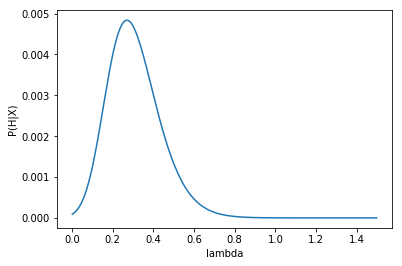

In [19]:
# input
xs = np.array([1.5, 2, 3, 4, 5, 12])

# split uniform space from which lambda is drawn into m equal bins
bins = np.linspace(0.001, 1.5, 1001)
nbr_bins = bins.shape[0] - 1
p_h = np.ones(nbr_bins) / nbr_bins
p_xh = np.zeros(nbr_bins)

# H = lambda is from this bin; for each bin, find the P(X|H)
for i in range(nbr_bins):
    lb = bins[i]
    ub = bins[i+1]
    lams = np.random.uniform(low=lb, high=ub, size=100)
    p_xh_lams = np.ones(lams.shape[0])
    for j in range(lams.shape[0]):
        for k in range(xs.shape[0]):
            # updated to get conditional probability
            z = math.exp(-lams[j]) - math.exp(-20 * lams[j])
            p_xh_lams[j] *= lams[j] * math.exp(-lams[j] * xs[k]) / z
    p_xh[i] = np.mean(p_xh_lams)

# compute normalizing factor
f = np.dot(p_h, p_xh)

# compute posterior
p_hx = np.multiply(p_xh, p_h) / f

plt.plot(bins[:-1], p_hx)
plt.xlabel("lambda")
plt.ylabel("P(H|X)")

__Exercise 8.5:__ In the 2008 Minnesota Senate race the final vote count was 1,212,629 votes for Al Franken and 1,212,317 votes for Norm Coleman. Franken was declared the winner, but as Charles Seife points out in Proofiness, the margin of victory was much smaller than the [margin of error](http://www.dummies.com/how-to/content/how-to-calculate-the-margin-of-error-for-a-sample-.html), so the result should have been considered a tie. 

Assuming that there is a chance that any vote might be lost and a chance that any vote might be double-counted, what is the probability that Coleman actually received more votes? 

Hint: you will have to fill in some details to model the error process. Also see [this blog post](http://allendowney.blogspot.com/2011/01/proofiness-and-elections.html) by Allen Downey for a discussion.

_We choose to model the votes as Poisson distributions based on a comment in the blog post above (per the definition, Poisson is the limit of binomial for large n)._

In [20]:
np.random.seed(1)
franken_dist = np.random.poisson(1212629, 1000)
coleman_dist = np.random.poisson(1212317, 1000)
nbr_coleman_wins = 0
for i in range(1000):
    if franken_dist[i] < coleman_dist[i]:
        nbr_coleman_wins += 1
print("p(coleman got more votes): %.3f" % (nbr_coleman_wins / 1000))

p(coleman got more votes): 0.403


## The Locomotive Problem

Also known as the German Tank Problem. Problem is as follows:

A railroad numbers its locomotives in order 1..N. One day you see a locomotive with the number 60. Estimate how many locomotives the railroad has?

_If I see train 60, then there has to be at minimum 60 trains. This is also the MLE assuming a uniform distribution, p(60|60) = 1/60. If N > 60, then p(i|N) < 1/60._

_Using the symmetry principle as described [here](http://math.stackexchange.com/questions/111374/solution-to-locomotive-problem-mosteller-fifty-challenging-problems-in-probabi), the best guess for the number of locomotives is 119 (locomotive 60, plus an equal number on either "side" of 60 gives 59 + 59 + 1 = 119._

_Posterior probability for each hypothesis $H_{n}$ that there are n trains is given by:_

$$P(H_{n} \space | \space i) = \frac {P(i \space | \space H_{n}) P(H_{n})}{P(i)}$$

Text(0, 0.5, 'posterior probability')

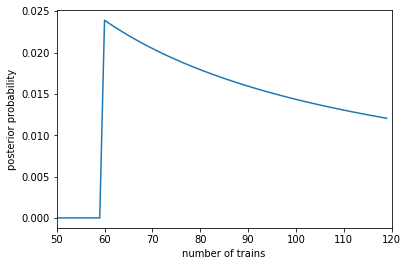

In [21]:
def prob_ihn(i, k):
    if i < k:
        return 0
    else:
        return 1 / i
    
nbr_trains = range(0, 120)
probs = np.zeros(120)
for i in nbr_trains:
    # P(g|Hn) = prob guess i  
    # P(Hn) = prob there are n trains is uniform hence 1/i
    probs[i] = prob_ihn(i, 60) * (1/120)
denom = np.sum(probs)
probs = probs / denom
plt.plot(range(120), probs)
plt.xlim((50, 120))
plt.xlabel("number of trains")
plt.ylabel("posterior probability")

In [22]:
prob_cdf_ps = np.cumsum(probs)
prob_cdf_xs = range(0, 120)
idx_5p = np.where(prob_cdf_ps <= 0.05)[0][-1]
idx_95p = np.where(prob_cdf_ps >= 0.95)[0][0]
lam_90ci_lb = prob_cdf_xs[idx_5p]
lam_90ci_ub = prob_cdf_xs[idx_95p]
print("90 percent confidence interval: %.3f - %.3f" % (lam_90ci_lb, lam_90ci_ub))

90 percent confidence interval: 61.000 - 115.000
